# HW1
This homework consists of two parts. The first is a refresher for python, data loading and manipulation. The second part discusses linear regression

Some info on the dataset:

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

[, 0]	 Model

[, 1]	mpg	Miles/(US) gallon

[, 2]	cyl	Number of cylinders

[, 3]	disp	Displacement (cu.in.)

[, 4]	hp	Gross horsepower

[, 5]	drat	Rear axle ratio

[, 6]	wt	Weight (1000 lbs)

[, 7]	qsec	1/4 mile time

[, 8]	vs	Engine (0 = V-shaped, 1 = straight)

[, 9]	am	Transmission (0 = automatic, 1 = manual)

[,10]	gear	Number of forward gears

[,11]	carb	Number of carburetors

## 1- Python Refresher
Load the dataset `mpg_data` using pandas and display the first five rows and the last two rows

In [10]:
# Solve Here
# import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

mpg_data = pd.read_csv('mpg_data.csv')
mpg_data.head()
mpg_data.tail(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


Calculate the mean and the variance for each of the columns

In [11]:
# Solve Here
print('MEAN of mpg_data\n{}\n'.format(np.mean(mpg_data)))
print('VARIANCE of mpg_data\n{}'.format(np.var(mpg_data)))

MEAN of mpg_data
model    (1.9470064700811806e-308+1.4603023323907456e-3...
mpg                                (20.090624999999996+0j)
cyl                                            (6.1875+0j)
disp                               (230.72187500000004+0j)
hp                                           (146.6875+0j)
drat                               (3.5965625000000006+0j)
wt                                 (3.2172499999999995+0j)
qsec                               (17.848750000000003+0j)
vs                                             (0.4375+0j)
am                                            (0.40625+0j)
gear                                           (3.6875+0j)
carb                                           (2.8125+0j)
dtype: complex128

VARIANCE of mpg_data
mpg        35.188975
cyl         3.089844
disp    14880.774834
hp       4553.964844
drat        0.276948
wt          0.927461
qsec        3.093380
vs          0.246094
am          0.241211
gear        0.527344
carb        2.527344
dtyp

The first column is called model. Although being called model, it contains the make and the model of the car. I would like you to find the average for all the columns grouped by the car make. Hint, the car make is the first word in the model column

In [12]:
# Solve Here
# store respective splits in new column
mpg_data['make'] = mpg_data.model.str.split(' ', n=1, expand=True)[0]
mpg_data.groupby(by=['make']).mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
make,,,,,,,,,,,
AMC,15.200000,8.000000,304.000000,150.000000,3.150000,3.435000,17.300000,0.000000,0.0,3.000000,2.0
Cadillac,10.400000,8.000000,472.000000,205.000000,2.930000,5.250000,17.980000,0.000000,0.0,3.000000,4.0
Camaro,13.300000,8.000000,350.000000,245.000000,3.730000,3.840000,15.410000,0.000000,0.0,3.000000,4.0
Chrysler,14.700000,8.000000,440.000000,230.000000,3.230000,5.345000,17.420000,0.000000,0.0,3.000000,4.0
Datsun,22.800000,4.000000,108.000000,93.000000,3.850000,2.320000,18.610000,1.000000,1.0,4.000000,1.0
Dodge,15.500000,8.000000,318.000000,150.000000,2.760000,3.520000,16.870000,0.000000,0.0,3.000000,2.0
Duster,14.300000,8.000000,360.000000,245.000000,3.210000,3.570000,15.840000,0.000000,0.0,3.000000,4.0
Ferrari,19.700000,6.000000,145.000000,175.000000,3.620000,2.770000,15.500000,0.000000,1.0,5.000000,6.0
Fiat,29.850000,4.000000,78.850000,66.000000,4.080000,2.067500,19.185000,1.000000,1.0,4.000000,1.0


In [13]:
# Solve Here
# print the nulls and NaNs
mpg_data.isna()
mpg_data.duplicated()
# drop any null or dulplicate rows
# mpg_data.dropna(inplace=True)
# mpg_data.drop_duplicates(subset=['model'], inplace=True)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,make
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

## 2- Linear Regression
In this section we will do linear regression on the data given to us. First, we start by showing some plots

refresh how we can do scatter plots in python. Now do a scatter plot for mpg and disp where mpg is on the y axis and disp is the x axis. Do you see strong relationship between them? explain

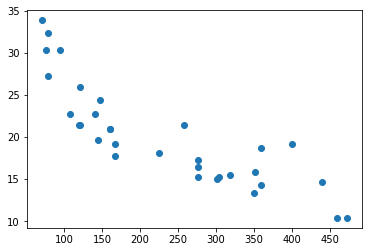

In [14]:
# Solve and Comment Here
plt.scatter(mpg_data.disp, mpg_data.mpg)

# the scatter plot shows a moderately strong negative correlation 
# between disp and mpg. when one increases the other decreases. the
# variables appear to have a strong linear relationship as well.

Build your own linear regression as we did in the lecture to calculate the coefficients and intercept that minimizes the lease square error when predicting mpg using disp. What are the values for the coefficients and intercept

-0.057846253817557036 35.00007079625381


E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


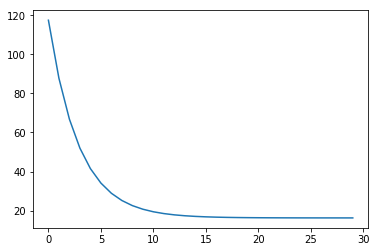

In [23]:
# Solve Here
# create a prediction function
def predict(feature, w, bias): # outcome is predicted value based on feature, weight, and bias
    predicted = w * feature + bias
    return predicted

# true_vals and predicted_vals typically have same length
# returns the error
def cost_function(truth, predicted):
    err = sum((truth-predicted)**2)/len(truth)
    return err

# returns the new weight and bias based on the derivatives
def update_weights(features,truth,weight,bias,alpha):
    deriv_w = sum((truth-(features*weight+bias))*features)*-2/len(features) # w_prime
    deriv_b = sum(truth-(features*weight+bias))*-2/len(features) # b_prime
    new_w = weight - alpha*deriv_w
    new_b = bias - alpha*deriv_b
    return new_w, new_b

# training for the proper weight and bias with iterations
def train(features,truth,weight,bias,alpha,iterations):
    cost_history = []
    for i in range(iterations):
        weight, bias = update_weights(features,truth,weight,bias,alpha)
        pred = predict(features,weight,bias)
        cost = cost_function(truth,pred)
        cost_history.append(cost)
    return weight, bias, cost_history

X, y = mpg_data['disp'], mpg_data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

w, b, c = train(X_train, y_train, -0.1, 35, 0.000001, 30)

print(w,b)
plt.plot(c)

Check if you get the same using sklearn linear regression model

In [22]:
# Solve Here
# improve the score by increasing iterations
model = LinearRegression()
model.fit(X_train.to_frame(), y_train)
model.coef_
model.intercept_
# note the lack of improvement because model is as good as possible in current state

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([-0.04027975])

29.698853583581013

Make a variable  called my_own_disp that goes between 100 and 500 with a step of 1. Use the variable and the coefficients calculated from the linear regression model to calculate the pred of mpg at each value of my_own_disp. Remember the equation pred=w0+w1*x. Plot the resulted line along with the scatter plot you plotted earlier and see if that is a good fit

In [29]:
# Solve Here
my_own_disp = np.asarray(range(100,501))
pred = predict(my_own_disp, -0.04028, 29.69885)
pred

array([25.67085, 25.63057, 25.59029, 25.55001, 25.50973, 25.46945,
       25.42917, 25.38889, 25.34861, 25.30833, 25.26805, 25.22777,
       25.18749, 25.14721, 25.10693, 25.06665, 25.02637, 24.98609,
       24.94581, 24.90553, 24.86525, 24.82497, 24.78469, 24.74441,
       24.70413, 24.66385, 24.62357, 24.58329, 24.54301, 24.50273,
       24.46245, 24.42217, 24.38189, 24.34161, 24.30133, 24.26105,
       24.22077, 24.18049, 24.14021, 24.09993, 24.05965, 24.01937,
       23.97909, 23.93881, 23.89853, 23.85825, 23.81797, 23.77769,
       23.73741, 23.69713, 23.65685, 23.61657, 23.57629, 23.53601,
       23.49573, 23.45545, 23.41517, 23.37489, 23.33461, 23.29433,
       23.25405, 23.21377, 23.17349, 23.13321, 23.09293, 23.05265,
       23.01237, 22.97209, 22.93181, 22.89153, 22.85125, 22.81097,
       22.77069, 22.73041, 22.69013, 22.64985, 22.60957, 22.56929,
       22.52901, 22.48873, 22.44845, 22.40817, 22.36789, 22.32761,
       22.28733, 22.24705, 22.20677, 22.16649, 22.12621, 22.08

Do a scatter plot between mpg and each of the features other than the model. Can you visually tell which features are more important in calculating the mpg?

In [ ]:
# Solve Here


Now, do a linear regression model using sklearn to fit all the features except the model and predict the mpg. What are the coefficients for each feature? Based on the coefficients, can you tell which features are important? Does it match your expectations from what you have visually seen?

In [ ]:
# Solve and Comment Here
